# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 2*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 2
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to implement some functionalities on the dataset that you worked with in the first assignment.

### DEADLINE FOR THIS ASSIGNMENT IS 01 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [2]:
# import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

## Preparing data

### 1. Read 2020 and 2021 data for your selected country. You only need provincial data for this assignment. Print the first 5 lines of data

In [3]:
df_2020 = pd.read_csv(r'C:\Users\loran\Desktop\Mechanical engineering - Delft\Master\2nd - Q1\Programming\Assignments\2020_NL_Region_Mobility_Report.csv')
df_2021 = pd.read_csv(r'C:\Users\loran\Desktop\Mechanical engineering - Delft\Master\2nd - Q1\Programming\Assignments\2021_NL_Region_Mobility_Report.csv')

df = pd.concat([df_2020,df_2021])
df.head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-15,1.0,1.0,11.0,3.0,0.0,0.0
1,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-16,-10.0,-8.0,-31.0,-5.0,-3.0,2.0
2,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-17,0.0,-1.0,8.0,-3.0,-5.0,1.0
3,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-18,5.0,4.0,21.0,-3.0,-5.0,1.0
4,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-19,3.0,0.0,20.0,-3.0,-5.0,1.0


### 2. For this assignment, select and extract the data for a single province. Name the dataframe for this subset `df_province_selected`

In [8]:
df_province_selected = df.loc[df.sub_region_1.str.contains("South Holland", na=False)]
# df_province_selected = df.loc[df.sub_region_2.str.contains("Delft", na=False)]

The following show an example from extracting the data for South Holland, the Netherlands

In [9]:
df_province_selected.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
80671,NL,Netherlands,South Holland,NaN,NaN,NL-ZH,NaN,ChIJ3xx5hqRHxEcRqpVxnOHVK_w,2020-02-15,0.0,2.0,8.0,2.0,-1.0,0.0
80672,NL,Netherlands,South Holland,NaN,NaN,NL-ZH,NaN,ChIJ3xx5hqRHxEcRqpVxnOHVK_w,2020-02-16,-11.0,-9.0,-34.0,-6.0,-3.0,2.0
80673,NL,Netherlands,South Holland,NaN,NaN,NL-ZH,NaN,ChIJ3xx5hqRHxEcRqpVxnOHVK_w,2020-02-17,-3.0,1.0,-2.0,2.0,2.0,1.0
80674,NL,Netherlands,South Holland,NaN,NaN,NL-ZH,NaN,ChIJ3xx5hqRHxEcRqpVxnOHVK_w,2020-02-18,3.0,5.0,13.0,2.0,3.0,0.0
80675,NL,Netherlands,South Holland,NaN,NaN,NL-ZH,NaN,ChIJ3xx5hqRHxEcRqpVxnOHVK_w,2020-02-19,2.0,2.0,26.0,2.0,3.0,0.0


### 3. Aggregated measurements

#### Write a function with the following arguments as the input:
- a dataset as a dataframe object
- list of attributes (refers to df.columns)
- a year
- one of the following statistic measurements: mean/median/max/min. You can use [enum](https://docs.python.org/3/library/enum.html) for this argument.
  
The function will then return the required statistic on some attributes of the data for a particular year.

In [10]:
def calculate_statistic(data,attributes, year, statistic):

    if year == 2020:
        x = pd.DataFrame(data.loc[df_province_selected.date.str.contains("2020", na=False)],columns=attributes)
    elif year == 2021:
        x = pd.DataFrame(data.loc[df_province_selected.date.str.contains("2021", na=False)],columns=attributes)  
    
    if statistic == 'mean':
        statistic_value = x.mean()
    elif statistic == 'median':
        statistic_value = x.median()
    elif statistic == 'max':
        statistic_value = x.max()
    elif statistic == 'min':
        statistic_value = x.min()
    print('The statistic values are: ')    
    return statistic_value


#### Call your calculate_statistic function and print the results with three different input arguments

In [13]:
data = df_province_selected
attributes = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline']
year = 2021
statistic = 'min'
calculate_statistic(data,attributes, year, statistic)

The statistic values are: 


retail_and_recreation_percent_change_from_baseline   -89.0
grocery_and_pharmacy_percent_change_from_baseline    -96.0
parks_percent_change_from_baseline                   -69.0
dtype: float64

## Activity changes

Since there are quite some noises when looking at daily data, it is easier to observe data on a larger aggregation level. The following code derives 7-day averages for the provice data. We also prepare a plot to visualise it for you.

In [14]:
df_province_selected['date'] = pd.to_datetime(df_province_selected['date'])

df_province_agg = df_province_selected.resample('7D', on='date').mean()
df_province_agg.reset_index(inplace=True)
df_province_agg.head()

D:\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,NaN,NaN,-0.618881,2.265517,-2.666667,-1.504032,1.405479,0.292000
1,2020-02-22,NaN,NaN,-0.552347,-0.608247,-13.645669,-13.285714,-18.691057,2.478448
2,2020-02-29,NaN,NaN,-1.894737,4.175862,-2.991597,-2.584000,2.021978,0.516000
3,2020-03-07,NaN,NaN,-3.068345,10.056140,4.282051,-6.594378,-0.820163,2.192771
4,2020-03-14,NaN,NaN,-23.779528,12.356643,9.990654,-43.692029,-37.062331,15.439153


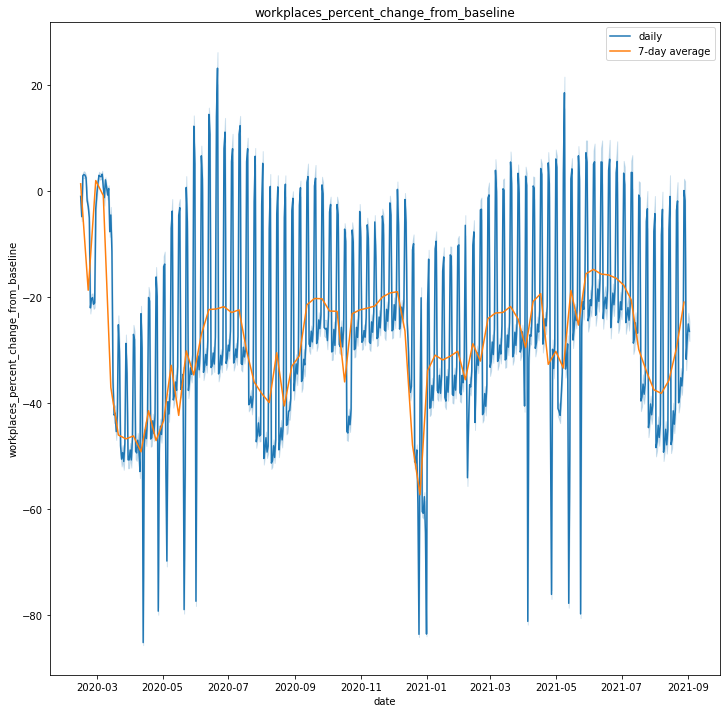

In [15]:
#Code to visualise the raw data and sampled data
fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('workplaces_percent_change_from_baseline')
sns.lineplot(x='date', y='workplaces_percent_change_from_baseline', data=df_province_selected, label='daily', ax=ax) 
sns.lineplot(data=df_province_agg, x='date', y='workplaces_percent_change_from_baseline', label='7-day average', ax=ax)
plt.show()

## Identifying peaks

Let's focus on the 7-day averaged data. This averaged time series data shows how many times workplace changes reach peaks. Your task is to identify these moments. 

### 4. Identify peaks with personal code

Complete the function below. Your function should return (at least) a list of indexes where there are peaks in data.

In [55]:
# I did not manage to complete this question. However, my thaughts about making this function is:
#define the data and activity as: x = pd.DataFrame(data,columns=['date', activity])
#Then I make an empty list, which will be filled with value higher than -15. So every datapoint higher than -15 will be
#assigned as a top.
# I did however delete **kwargs, since I did not know what to do with the function
def my_find_peaks(data,activity):
    """[summary]

    Args:
        data (dataframe): dataframe with at least two attribute columns: date and the given activity
        activity (str): one of the (six) available mobility activities
        kwargs: a dictionary of arguments. Use these to customise your function on finding peaks
    """
    x = pd.DataFrame(data,columns=['date', activity])
    L=[]
    # look at the gradient
    for i in x[activity]:
        if i > -15:
            L.append(i)       
    return L


In [56]:
activity = 'workplaces_percent_change_from_baseline'
# x = df_province_agg[activity]
# peak_indexes = find_peaks(x)
# max_ind = peak_indexes[0]
# max_ind = list(max_ind)
# max_ind = df_province_agg.iloc[max_ind,:]

max_ind = my_find_peaks(
    df_province_agg, 
    activity
)
max_ind = list(max_ind)
max_ind = df_province_agg.iloc[max_ind,:]
print(max_ind)

         date  metro_area  census_fips_code  \
1  2020-02-22         NaN               NaN   
2  2020-02-29         NaN               NaN   
0  2020-02-15         NaN               NaN   
67 2021-05-29         NaN               NaN   

    retail_and_recreation_percent_change_from_baseline  \
1                                           -0.552347    
2                                           -1.894737    
0                                           -0.618881    
67                                           2.779851    

    grocery_and_pharmacy_percent_change_from_baseline  \
1                                           -0.608247   
2                                            4.175862   
0                                            2.265517   
67                                          17.366782   

    parks_percent_change_from_baseline  \
1                           -13.645669   
2                            -2.991597   
0                            -2.666667   
67                 

In [57]:
# Assign the data related to the max_ind to df_max
df_max = max_ind 

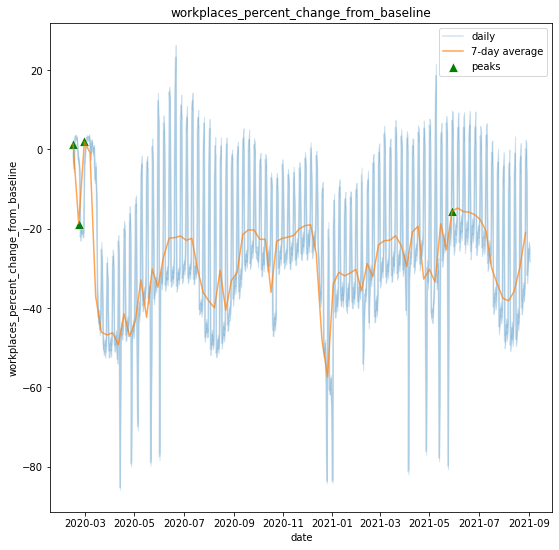

In [52]:
#Code to visualise the raw data, sampled data and the peaks
# create a figure and an axis to plot
fig, ax = plt.subplots(figsize=(9,9))
# set the title of the plot
ax.set_title(activity)
# plot the daily values
sns.lineplot(x='date', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
# plot the 7-day average
sns.lineplot(data=df_province_agg, x='date', y=activity, label='7-day average', ax=ax, alpha=0.7)
# label the peaks
sns.scatterplot(x='date', y=activity, data=df_max, label='peaks', ax=ax, marker='^', color='g', s=100)
plt.show()

### 5. Identify peaks using library scipy - [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

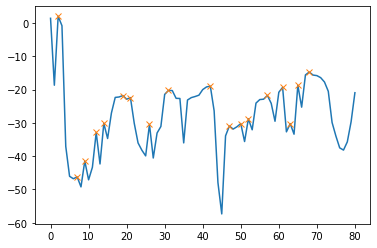

In [58]:
x = df_province_agg['workplaces_percent_change_from_baseline']
peaks = find_peaks(x)
peaks = peaks[0]

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

### 6. Identify valleys

You have identified the peaks in the data above using both your personal approach and the scipy library. Here, you can also identify the valleys (or troughs) using either of these approaches.

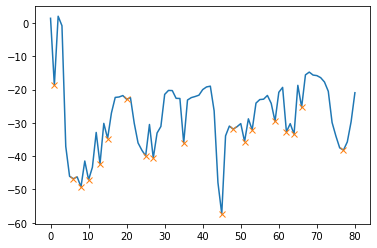

In [63]:
#I used the second method, since this standard function works well
#To find valleys I inversed the data for df_province_agg

inv_data_y = df_province_agg[activity]*(-1) 
valleys = find_peaks(inv_data_y)
valleys = valleys[0]

plt.plot(x)
plt.plot(valleys, x[valleys], "x")
plt.show()



### 7. Identify all the peaks (and potentially valleys) for all the activities in the data. Print out the peaks for each of the activities. 

If you are brave, you can make use of the plotting piece of code that is provided above to plot the results.

In [73]:
import numpy as np
# from scipy.signal import argrelextrema

##peaks
activity =  ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'] 
activity = np.array(activity)

print('The peaks are: ')
for i in range(len(activity)):
        
        peak_indexes = find_peaks(df_province_agg[activity[i]])
        peak_indexes = peak_indexes[0]
        peak_indexes = list(peak_indexes)
        print(peak_indexes)

####valleys
print('The valleys are: ')
for i in range(len(activity)):
    
    inv_data_y = df_province_agg[activity[i]]*(-1) 
    valley_indexes = find_peaks(inv_data_y)
    valley_indexes = valley_indexes[0]
    valley_indexes = list(valley_indexes)
    print(valley_indexes)
    



The peaks are: 
[1, 7, 11, 14, 18, 21, 30, 38, 40, 47, 50, 53, 58, 64, 68, 74, 77, 79]
[4, 7, 14, 16, 18, 21, 32, 34, 36, 38, 40, 43, 47, 50, 53, 58, 62, 65, 67, 73, 77]
[5, 7, 9, 11, 13, 15, 18, 22, 25, 30, 35, 38, 40, 43, 47, 49, 53, 58, 61, 64, 67, 69, 72, 74, 77, 79]
[2, 7, 9, 14, 18, 21, 30, 38, 41, 47, 53, 58, 61, 65, 67, 72, 74, 77]
[2, 7, 9, 12, 14, 19, 21, 26, 31, 42, 47, 50, 52, 57, 61, 63, 65, 68]
[1, 6, 8, 10, 19, 25, 27, 35, 37, 41, 45, 49, 51, 55, 59, 62, 64, 66, 70, 73, 75, 78]
The valleys are: 
[6, 8, 12, 15, 19, 26, 36, 39, 45, 48, 51, 55, 59, 65, 70, 75, 78]
[1, 6, 8, 15, 17, 20, 26, 33, 35, 37, 39, 42, 45, 48, 51, 55, 59, 63, 66, 71, 76, 78]
[1, 6, 8, 10, 12, 14, 16, 20, 23, 27, 33, 36, 39, 42, 45, 48, 50, 56, 59, 63, 66, 68, 70, 73, 75, 78]
[1, 6, 8, 10, 16, 19, 27, 35, 39, 45, 48, 55, 59, 63, 66, 70, 73, 76, 78]
[1, 6, 8, 10, 13, 15, 20, 25, 27, 35, 45, 48, 51, 53, 59, 62, 64, 66, 77]
[2, 7, 9, 18, 22, 26, 30, 36, 40, 42, 47, 50, 54, 58, 61, 63, 65, 68, 71, 74, 77]

### 8. Is there any common dates (or periods) among these peaks (and/or valleys) of different activities

*Food for thoughts*:
- One of the most naive way to find the overlapping dates is to look for common indexes (or dates) of the peaks/valleys
- A more general solution is to have a tolerance level between the days. For example, Sep 19 and Sep 20 can be considered matched (or overlapped) if the tolerance level is at least one day.

In [74]:
# Yes, often indeces for the peaks are equal, which means the periods are the same. 
# This also holds for some indexes in the valley arrays, so also here the periods are the same.


## OPTIONAL

Append population/density for provinces/municipalities to the dataframe. The data for Netherlands is available [here](https://www.cbs.nl/en-gb/news/2021/30/population-growth-picks-up-again)


In [ ]:
# YOUR CODE HERE
